In [30]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from math import cos, pi

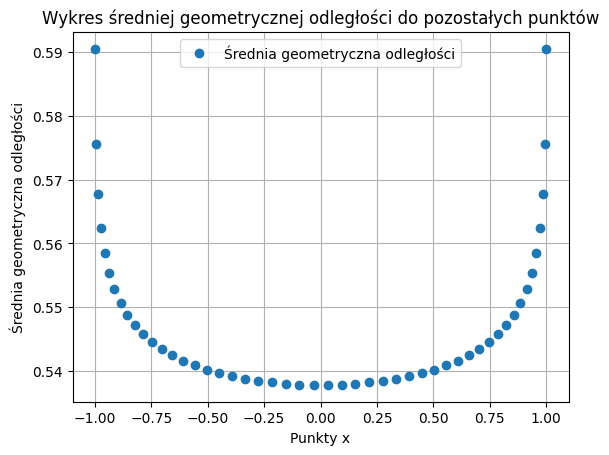

In [31]:
# Task 1
def plot_geometric_mean_distances(x):
    """
    Funkcja przyjmuje wektor punktów x z przedziału.
    Dla każdego punktu x[i] oblicza średnią geometryczną odległości od x[i] do pozostałych punktów,
    a następnie tworzy wykres, na którym na osi y znajduje się średnia geometryczna odległości danego
    punktu do innyfch punktów.
    """
    x = np.array(x)
    n = len(x)
    y = np.zeros(n)
    
    # Dla każdego punktu x[i] obliczamy odległości do pozostałych punktów
    for i in range(n):
        # bez punktu x[i]
        distances = np.abs(x[i] - np.delete(x, i))

        # Średnia geometryczna: exp(mean(log(distances)))
        y[i] = np.exp(np.mean(np.log(distances)))
    
    # Tworzenie wykresu
    plt.plot(x, y, 'o', label='Średnia geometryczna odległości')
    plt.xlabel('Punkty x')
    plt.ylabel('Średnia geometryczna odległości')
    plt.title('Wykres średniej geometrycznej odległości do pozostałych punktów')
    plt.legend()
    plt.grid(True)
    plt.show()

def generateChebyshevPoints(n):
    return [-cos((2*i - 1)*pi / (2*n)) for i in range(1, n+1)]

def generateLegendrePoints(n):
    coef = np.zeros(n + 1)
    coef[-1] = 1
    return np.polynomial.legendre.legroots(coef)

def generateEquispacedPoints(n):
    return np.linspace(-1, 1, n)

points = generateLegendrePoints(50)
plot_geometric_mean_distances(points)

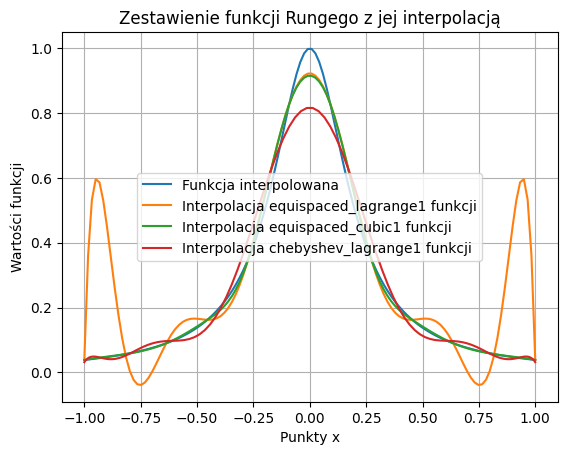

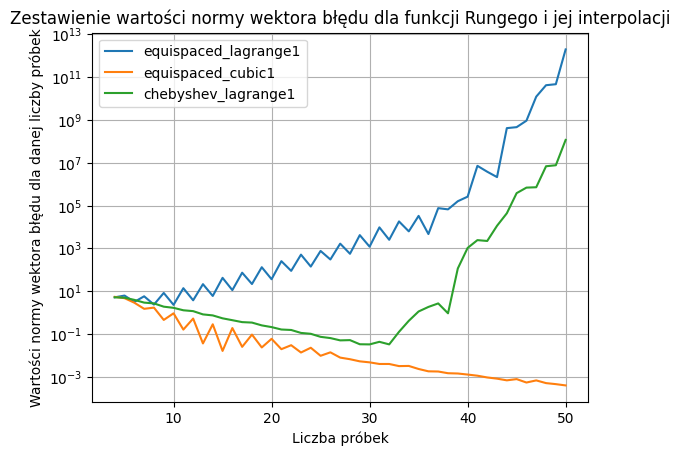

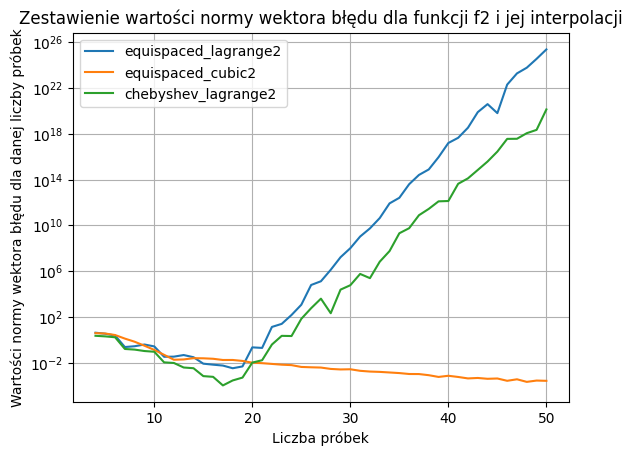

In [33]:
# Task 2
import scipy.interpolate

f1 = lambda x: 1/(1+25*x*x)
f2 = lambda x: np.exp(np.cos(x))

domain1 = [-1, 1]
domain2 = [0, 2*pi]

def generate_interpolations(f, n, domain):
    """This function takes the interpolated function f and the number of nodes n.
    The following interpolations are returned (in the given order):
    1. Lagrange interpolation with equispaced nodes
    2. Cubic splines with equispaced nodes
    3. Lagrange interpolation with Chebyshev nodes
    """
    equispaced_nodes = np.linspace(domain[0], domain[1], n)
    chebyshev_nodes = generateChebyshevPoints(n)
    chebyshev_nodes = [(node+1)/2*(domain[1]-domain[0])+domain[0] for node in chebyshev_nodes]
    return scipy.interpolate.lagrange(equispaced_nodes, [f(x) for x in equispaced_nodes]), \
           scipy.interpolate.CubicSpline(equispaced_nodes, [f(x) for x in equispaced_nodes]), \
           scipy.interpolate.lagrange(chebyshev_nodes, [f(x) for x in chebyshev_nodes])

# Presenting a chart with chosen approximations
def plot_f_with_approx(f, approx_f_list, sample_list, fun_name):
    plt.plot(sample_list[0], [f(x) for x in sample_list[0]], label='Funkcja interpolowana')
    for (approx_name, approx_f), samples in zip(approx_f_list, sample_list[1:]):
        plt.plot(samples, [approx_f(x) for x in samples], label='Interpolacja '+approx_name+' funkcji')
    plt.xlabel('Punkty x')
    plt.ylabel('Wartości funkcji')
    plt.title('Zestawienie funkcji '+fun_name+' z jej interpolacją')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generating interpolations
n = 12
equispaced_lagrange1, equispaced_cubic1, chebyshev_lagrange1 = generate_interpolations(f1, n, domain1)

# Plotting the interpolated functions
approx_names1 = ['equispaced_lagrange1', 'equispaced_cubic1', 'chebyshev_lagrange1']
approx_names2 = ['equispaced_lagrange2', 'equispaced_cubic2', 'chebyshev_lagrange2']
approx_list = list(zip(approx_names1, [equispaced_lagrange1, equispaced_cubic1, chebyshev_lagrange1]))
sample_list = [generateEquispacedPoints(10*n), generateEquispacedPoints(10*n), generateEquispacedPoints(10*n), generateChebyshevPoints(10*n)]
plot_f_with_approx(f1, approx_list, sample_list, 'Rungego')

n_range = (4, 51) # [4, 51)
interpolations_list1 = [generate_interpolations(f1, n, domain1) for n in range(*n_range)]
interpolations_list2 = [generate_interpolations(f2, n, domain2) for n in range(*n_range)]

def generate_error_norm(f, f_approx, domain, n = 500):
    samples = np.random.rand(n)*(domain[1]-domain[0])+domain[0]
    return np.sqrt(sum((f(x)-f_approx(x))**2 for x in samples))

error_norms1 = [(generate_error_norm(f1, interpolation, domain1) for interpolation in interpolations) for interpolations in interpolations_list1]
error_norms2 = [(generate_error_norm(f2, interpolation, domain2) for interpolation in interpolations) for interpolations in interpolations_list2]

def plot_error_norms(error_norms, n_range, approx_names, fun_name):
    point_sets = [([], []) for _ in range(len(approx_names))]
    for norms, n in zip(error_norms, range(*n_range)):
        for i, norm in enumerate(norms):
            point_sets[i][0].append(n)
            point_sets[i][1].append(norm)
    for i, points in enumerate(point_sets):
        plt.plot(*points, label=approx_names[i])
    plt.xlabel('Liczba próbek')
    plt.ylabel('Wartości normy wektora błędu dla danej liczby próbek')
    plt.yscale('log')
    plt.title('Zestawienie wartości normy wektora błędu dla funkcji '+fun_name+' i jej interpolacji')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_error_norms(error_norms1, n_range, approx_names1, 'Rungego')
plot_error_norms(error_norms2, n_range, approx_names2, 'f2')
    